In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
path = r"C:\Users\SajjadAli\Documents\Codes\Sanjay\IFRS_22July\GMM\GMM_Input_v5.xlsx"
xlsx = pd.ExcelFile(path)

xlsx

In [99]:
sheets = xlsx.sheet_names
sheets

['General',
 'Projected_CFs',
 'Cashflow Info',
 'GOC_List',
 'DRs',
 'Actual_CFs',
 'Coverage_Unit_Info',
 'Reference']

In [100]:
data = pd.read_excel(xlsx, sheet_name=sheets[0])

data.head()

c:\Users\SajjadAli\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,Entity Name,Dummy,NaN
3,NaN,NaN,NaN,NaN
4,NaN,Closing Date,2023-12-31 00:00:00,Valuation Date


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  9 non-null      object 
 2   Unnamed: 2  9 non-null      object 
 3   Unnamed: 3  2 non-null      object 
dtypes: float64(1), object(3)
memory usage: 580.0+ bytes


In [102]:
data = pd.read_excel(xlsx, sheet_name=sheets[1])

data.head()

c:\Users\SajjadAli\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,GOC_ID,Cashflow_Date,Incurred_Date,Run Info,Premiums,Acquisition_Costs,Expenses,Death_Benefit,Maturity_Benefit,Surrender_Benefit,Annuity_Benefit,Other_Benefit,Investment_Component,Risk Adjustment
0,87,2023-12-31,2023-12-31,Base,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,32576.64411
1,87,2023-01-31,2023-01-31,Base,1870.680000,1630.496974,29.657813,119.024920,0.0,NaN,0.000000,53.904762,NaN,32576.64411
2,87,2023-02-28,2023-02-28,Base,7972.931593,3262.303917,61.193170,217.549851,0.0,NaN,0.001540,95.535430,NaN,32576.64411
3,87,2023-03-31,2023-03-31,Base,8005.335601,6975.151918,150.922335,647.229965,0.0,NaN,5.654028,228.950939,NaN,32576.64411
4,87,2023-04-30,2023-04-30,Base,3795.313563,1934.916902,192.405268,755.322183,0.0,NaN,5.467382,274.408065,NaN,32576.64411


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   GOC_ID                1456 non-null   int64         
 1   Cashflow_Date         1456 non-null   datetime64[ns]
 2   Incurred_Date         1456 non-null   datetime64[ns]
 3   Run Info              1456 non-null   object        
 4   Premiums              1455 non-null   float64       
 5   Acquisition_Costs     1455 non-null   float64       
 6   Expenses              1455 non-null   float64       
 7   Death_Benefit         1455 non-null   float64       
 8   Maturity_Benefit      1455 non-null   float64       
 9   Surrender_Benefit     0 non-null      float64       
 10  Annuity_Benefit       1456 non-null   float64       
 11  Other_Benefit         1456 non-null   float64       
 12  Investment_Component  0 non-null      float64       
 13  Risk Adjustment   

In [104]:
data.describe(include="all")

,GOC_ID,Cashflow_Date,Incurred_Date,Run Info,Premiums,Acquisition_Costs,Expenses,Death_Benefit,Maturity_Benefit,Surrender_Benefit,Annuity_Benefit,Other_Benefit,Investment_Component,Risk Adjustment
count,1456.0,1456,1456,1456,1455.000000,1455.000000,1455.000000,1455.000000,1455.0,0.0,1456.000000,1456.000000,0.0,1456.000000
unique,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Base,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.0,2038-11-13 21:44:30.329670656,2038-11-13 21:44:30.329670656,NaN,1723.490016,133.392743,91.725485,633.763622,0.0,NaN,3.515545,278.680375,NaN,5136.133328
min,87.0,2023-01-31 00:00:00,2023-01-31 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,NaN,0.000000
25%,87.0,2031-04-22 12:00:00,2031-04-22 12:00:00,NaN,59.189420,2.846719,4.309972,51.170062,0.0,NaN,1.245189,24.955098,NaN,120.583242
50%,87.0,2038-11-15 00:00:00,2038-11-15 00:00:00,NaN,582.308792,31.249155,25.664172,390.494007,0.0,NaN,2.076256,123.675056,NaN,1258.053926
75%,87.0,2046-06-07 12:00:00,2046-06-07 12:00:00,NaN,2363.004921,131.647394,134.674221,1045.801701,0.0,NaN,6.135714,466.185572,NaN,6763.574877
max,87.0,2053-12-31 00:00:00,2053-12-31 00:00:00,NaN,17671.184898,8163.845943,567.032733,2790.081349,0.0,NaN,11.122146,1303.175568,NaN,34213.934594


<Axes: xlabel='GOC_ID', ylabel='Risk Adjustment'>

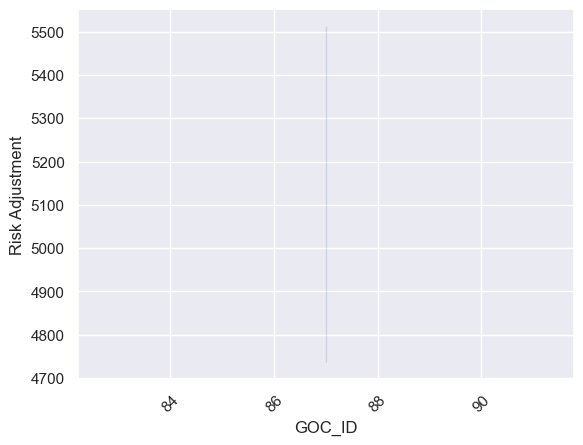

In [105]:
sns.set_theme(style="darkgrid")
plt.xticks(rotation=45)

sns.lineplot(data=data, x="GOC_ID", y="Risk Adjustment")

<Axes: xlabel='GOC_ID', ylabel='Risk Adjustment'>

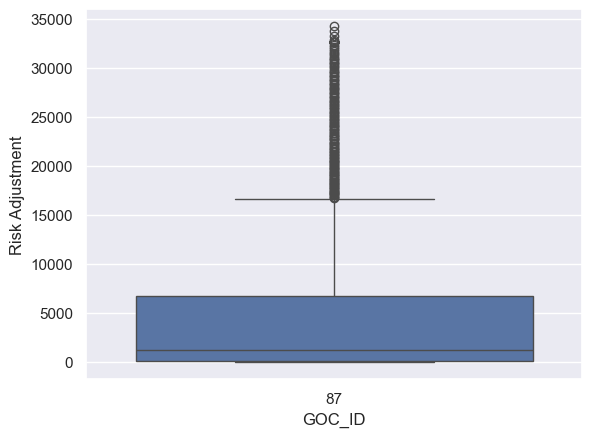

In [106]:
sns.plotting_context()

sns.boxplot(data=data, x="GOC_ID", y="Risk Adjustment")

<Axes: xlabel='GOC_ID', ylabel='Risk Adjustment'>

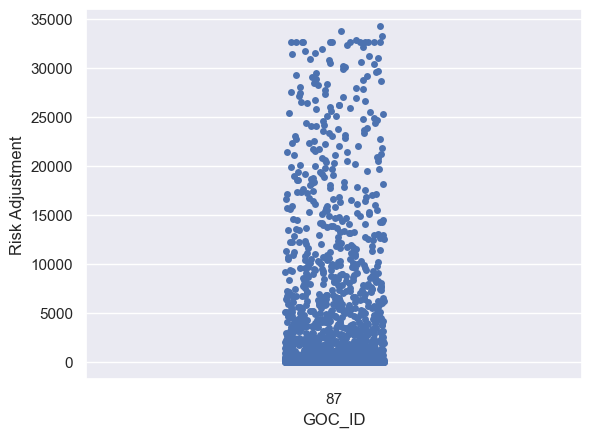

In [107]:
sns.stripplot(data=data, x="GOC_ID", y="Risk Adjustment")

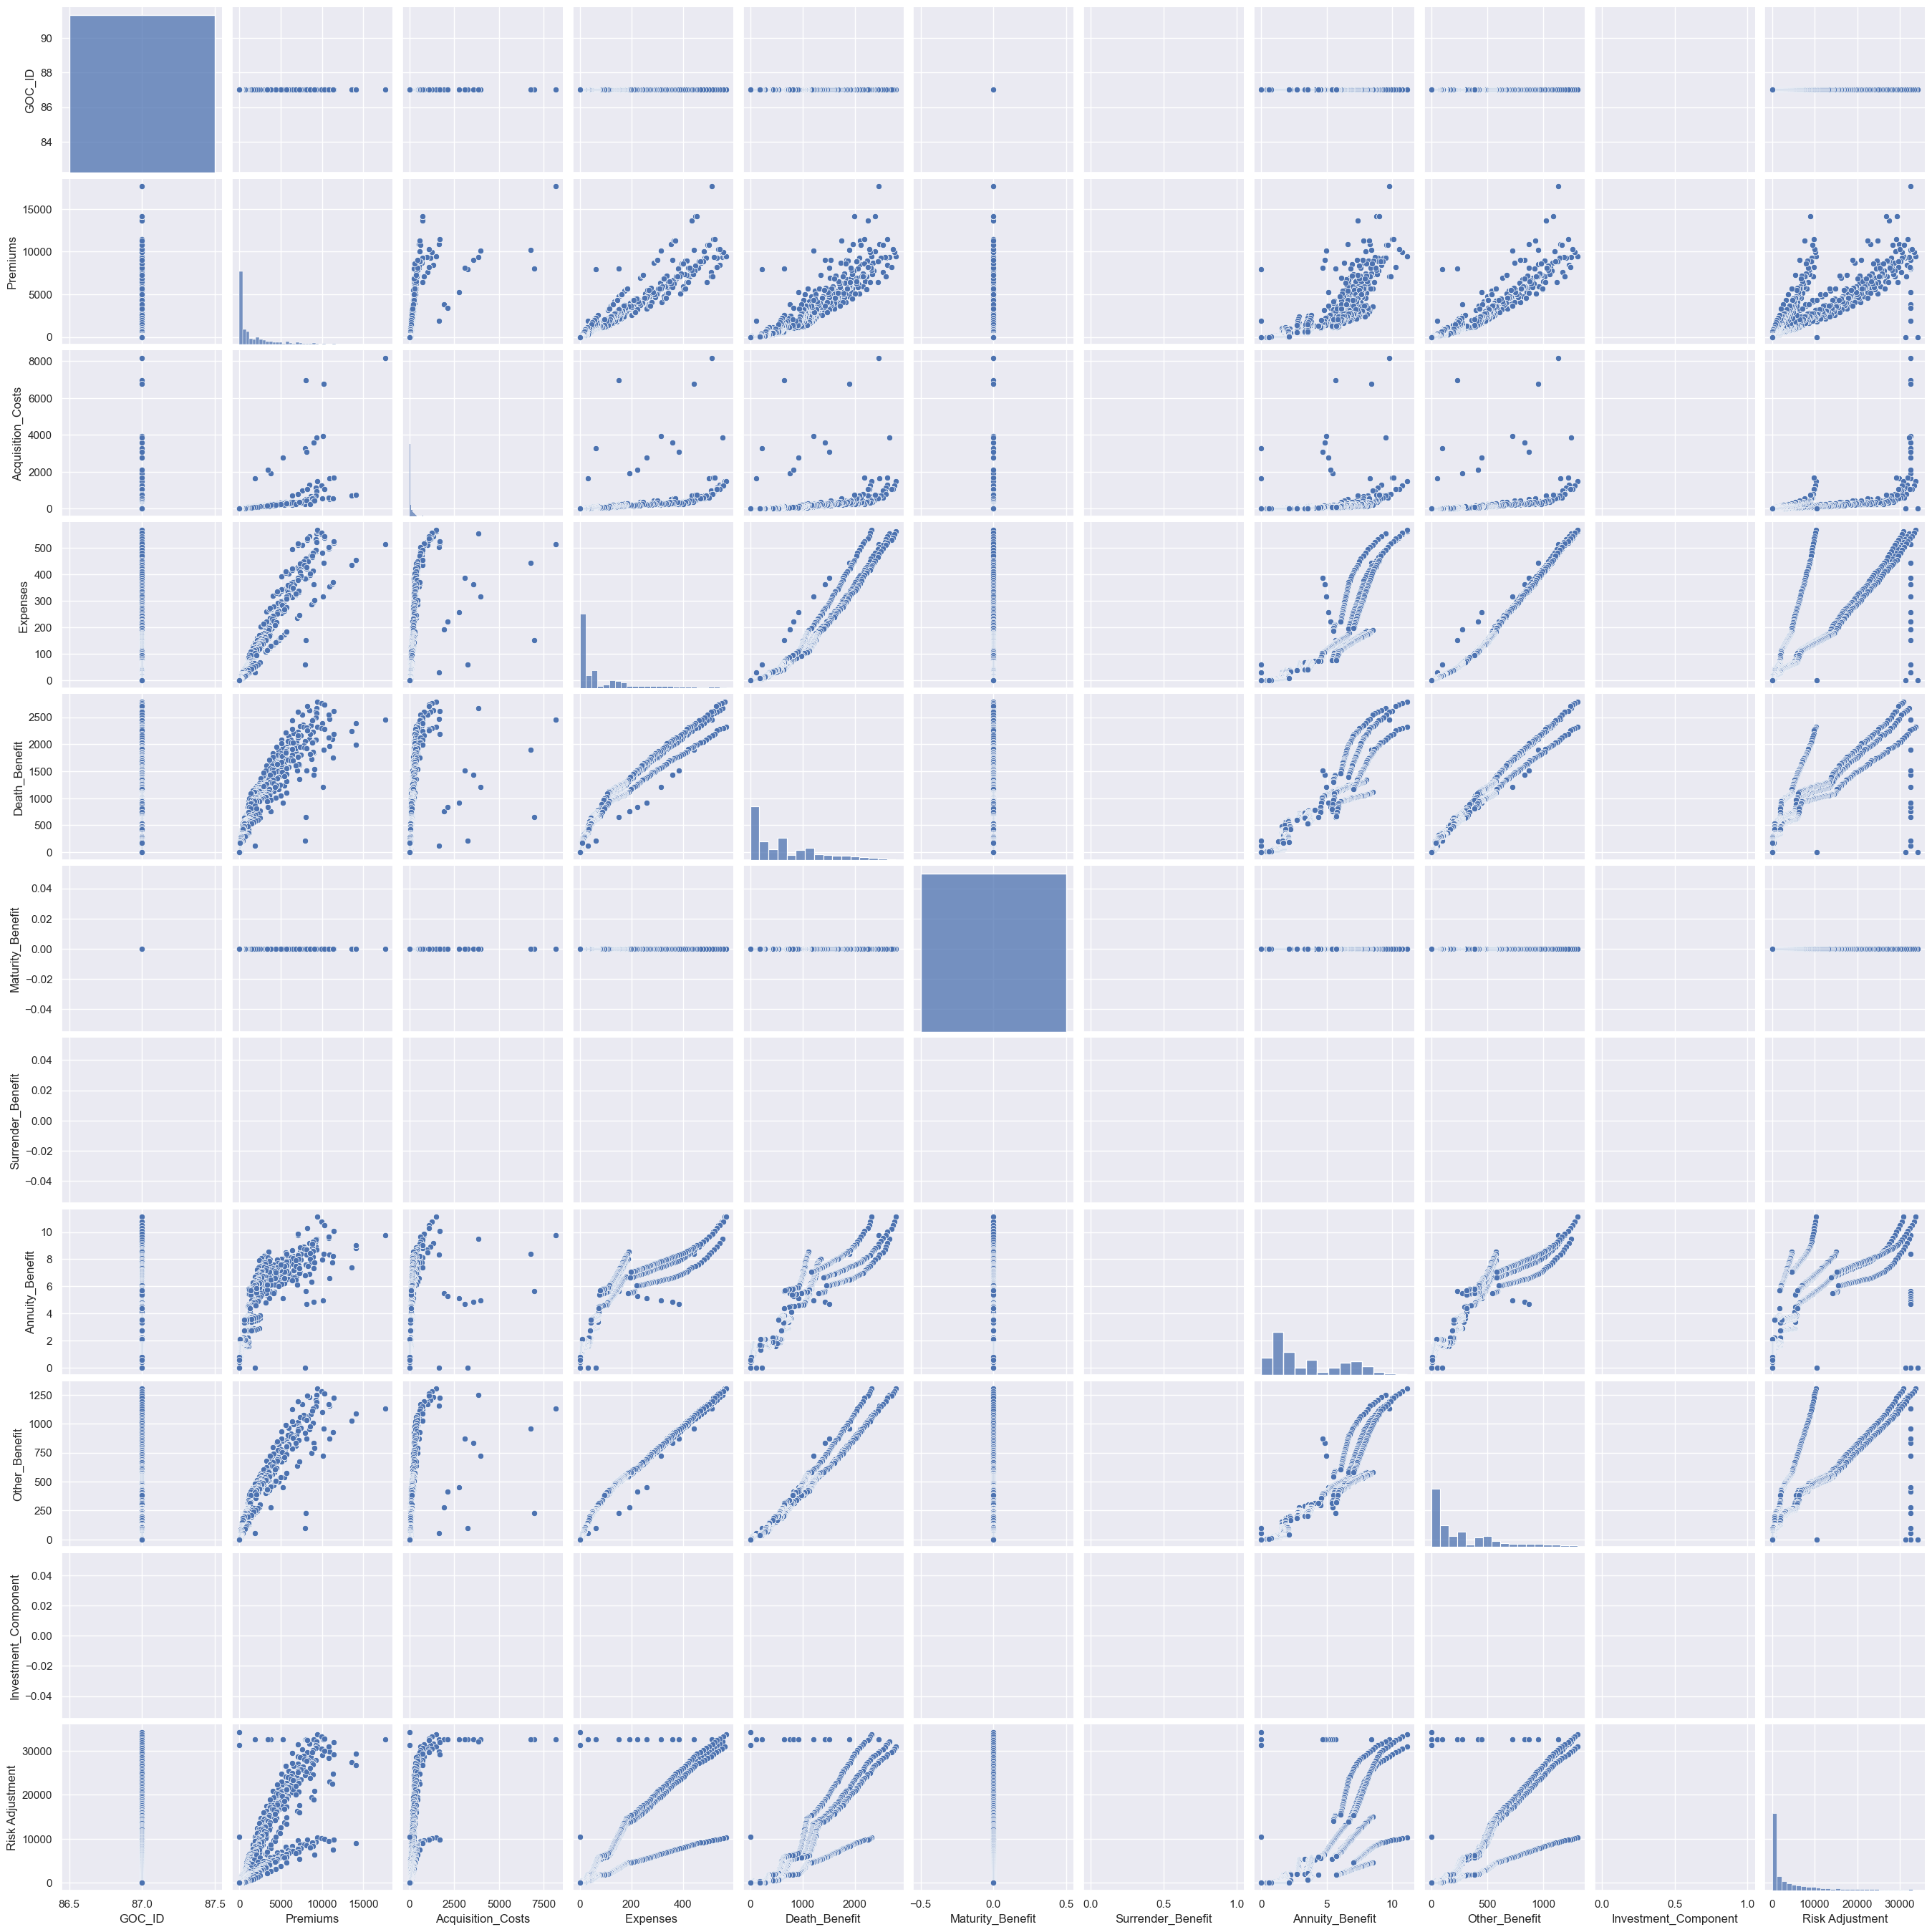

In [108]:
sns.pairplot(data=data)

In [109]:
data = pd.read_excel(xlsx, sheet_name=sheets[2])

print(sheets[2])
data.head()

Cashflow Info


c:\Users\SajjadAli\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,GOC,Cashflow Type,Cashflow Occurrence,Discounting,Cummulative
0,87,Premiums,Beginning of period,Yes,No
1,87,Acquisition Costs,Beginning of period,Yes,No
2,87,Expenses,Beginning of period,Yes,No
3,87,Death Benefit,End of period,Yes,No
4,87,Maturity Benefit,Beginning of period,Yes,No


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GOC                  11 non-null     int64 
 1   Cashflow Type        11 non-null     object
 2   Cashflow Occurrence  11 non-null     object
 3   Discounting          11 non-null     object
 4   Cummulative          11 non-null     object
dtypes: int64(1), object(4)
memory usage: 572.0+ bytes


In [111]:
data.describe(include="all")

,GOC,Cashflow Type,Cashflow Occurrence,Discounting,Cummulative
count,11.0,11,11,11,11
unique,NaN,11,2,2,2
top,NaN,Premiums,End of period,Yes,No
freq,NaN,1,6,10,9
mean,87.0,NaN,NaN,NaN,NaN
std,0.0,NaN,NaN,NaN,NaN
min,87.0,NaN,NaN,NaN,NaN
25%,87.0,NaN,NaN,NaN,NaN
50%,87.0,NaN,NaN,NaN,NaN
75%,87.0,NaN,NaN,NaN,NaN


<Axes: xlabel='Discounting', ylabel='Cashflow Type'>

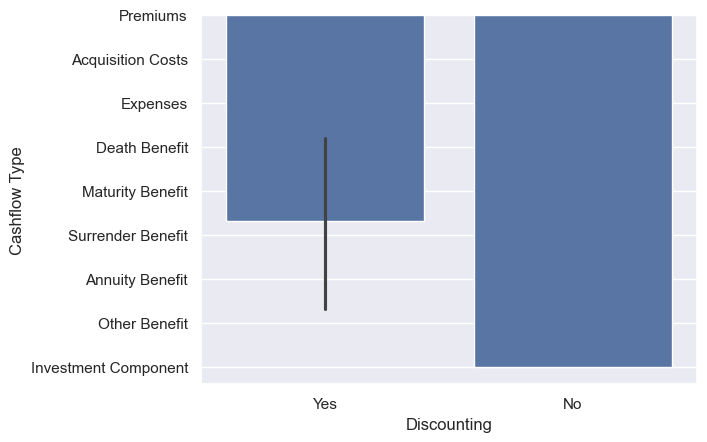

In [112]:
sns.set_theme(style="darkgrid")

sns.barplot(data=data, x="Discounting", y="Cashflow Type")

<Axes: xlabel='Cummulative', ylabel='Cashflow Type'>

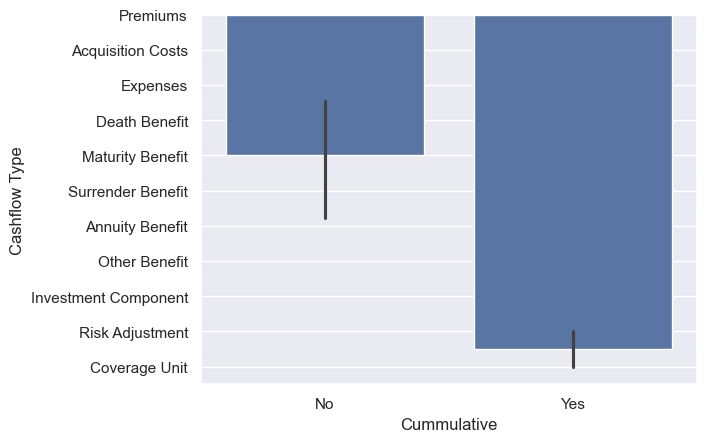

In [113]:
sns.barplot(data=data, x="Cummulative", y="Cashflow Type")

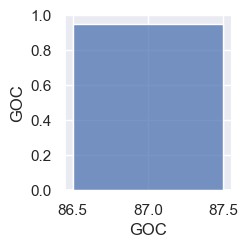

In [114]:
sns.pairplot(data=data)

<Axes: xlabel='Cummulative', ylabel='Cashflow Type'>

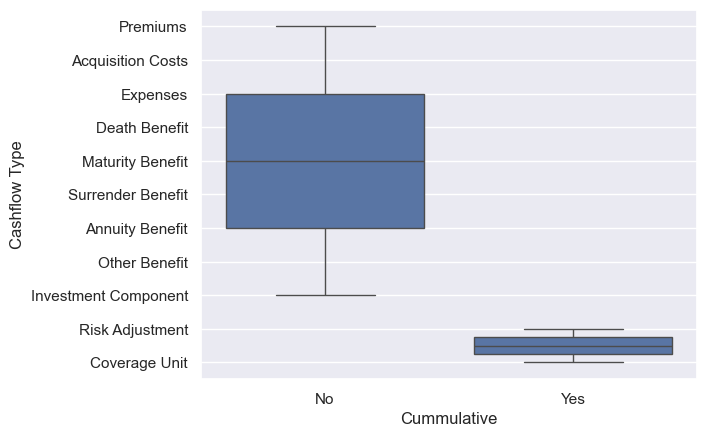

In [115]:
sns.boxplot(data=data, y="Cashflow Type", x="Cummulative")

<Axes: xlabel='Discounting', ylabel='Cashflow Type'>

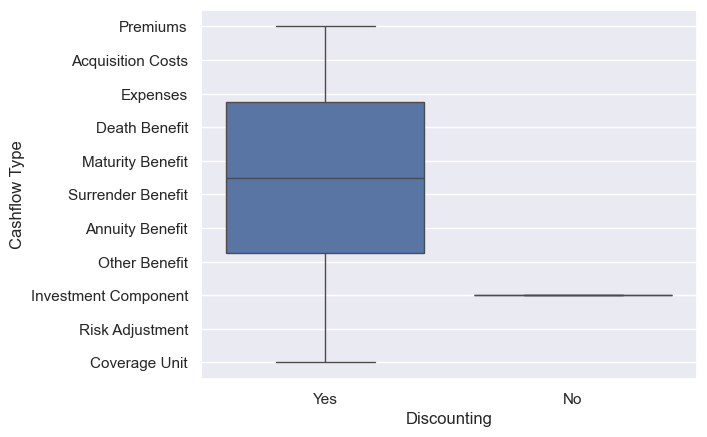

In [116]:
sns.boxplot(data=data, y="Cashflow Type", x="Discounting")

In [117]:
data = pd.read_excel(xlsx, sheet_name=sheets[3])

data.head()

c:\Users\SajjadAli\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,S_No,GOC_ID,GOC_Name,Inception_Date,Measurement_Model,LRC_RA_Loading,Apply_LRC_RA_Loading_On,LIC_RA_Loading,Apply_LIC_RA_Loading_On,LIC_Discounting (0-No;1-Yes),...,NB_Discouting_Option (0-No;1-Yes),CUs_GMM,Gross_RI,RI_Non_Performance,Portfolio,Onerosity,OCI_Option (0-No;1-Yes),RA_Manual (0-No;1-Yes),CU_Discouting_Option (0-No;1-Yes),RA_Segregation (0-No;1-Yes)
0,1,87,DEC TERM,2023-01-01,GMM,0.08,Claims only,0.08,Claims only,1,...,0,SI,Gross,0,DEC TERM,Profitable,0,1,0,0


In [118]:
data = pd.read_excel(xlsx, sheet_name=sheets[4])

print(sheets[4])
data.head()

DRs


,Valuation_Date,Periods,DR
0,2022-12-31,1,0.056951
1,2022-12-31,2,0.052277
2,2022-12-31,3,0.050156
3,2022-12-31,4,0.049215
4,2022-12-31,5,0.049016


In [119]:

data.describe(include="all")

,Valuation_Date,Periods,DR
count,120,120.000000,120.000000
mean,2023-07-01 12:00:00,30.500000,0.053953
min,2022-12-31 00:00:00,1.000000,0.044700
25%,2022-12-31 00:00:00,15.750000,0.052202
50%,2023-07-01 12:00:00,30.500000,0.054313
75%,2023-12-31 00:00:00,45.250000,0.056370
max,2023-12-31 00:00:00,60.000000,0.059046
std,NaN,17.390715,0.003337


<Axes: xlabel='Periods', ylabel='DR'>

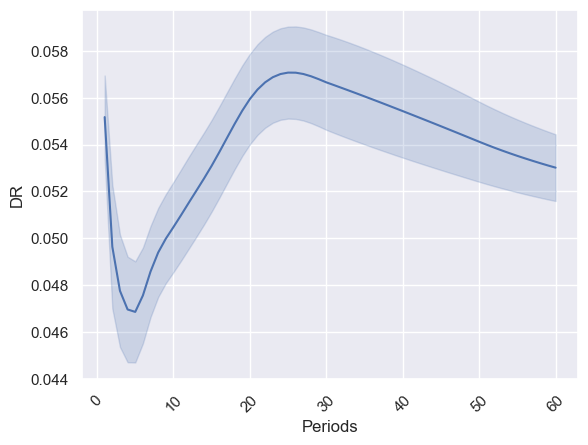

In [120]:
sns.set_theme(style="darkgrid")
plt.xticks(rotation=45)

sns.lineplot(data=data, x="Periods", y="DR")

<Axes: xlabel='Valuation_Date', ylabel='DR'>

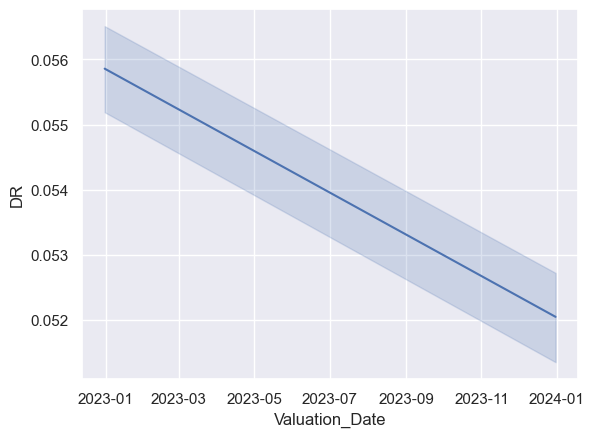

In [121]:
sns.lineplot(data=data, x="Valuation_Date", y="DR")

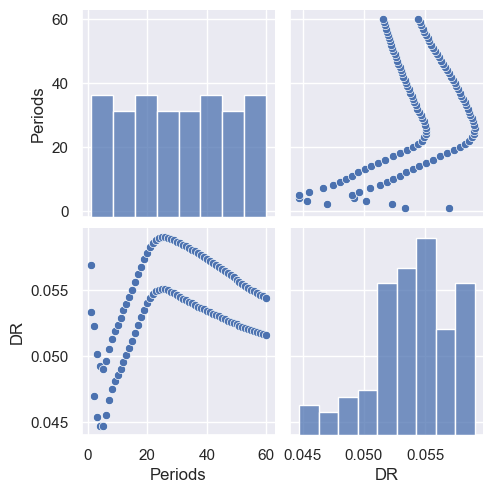

In [122]:
sns.pairplot(data=data)

In [123]:
data = pd.read_excel(xlsx, sheet_name=sheets[5])

print(sheets[5])

data.head()

Actual_CFs


,GOC_ID,Cashflow_Date,Incurred_Date,Premiums,Acquisition_Costs,Expenses,Death_Benefit,Maturity_Benefit,Surrender_Benefit,Annuity_Benefit,Other_Benefit,Investment_Component,Non-Attributable_Expenses
0,87,2023-12-31,2023-12-31,93299.93,38763.3449,654.17,56114.38,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
len(sheets)

8

In [125]:
data = pd.read_excel(xlsx, sheet_name=sheets[6])

print(sheets[6])

data.head()

Coverage_Unit_Info


,GOC_ID,Run Info,Cashflow_Date,Coverage Unit
0,87,Final,2023-12-31,1.655060e+09
1,87,Final,2024-01-31,1.624335e+09
2,87,Final,2024-02-29,1.594102e+09
3,87,Final,2024-03-31,1.564444e+09
4,87,Final,2024-04-30,1.535520e+09


<Axes: xlabel='Run Info', ylabel='Coverage Unit'>

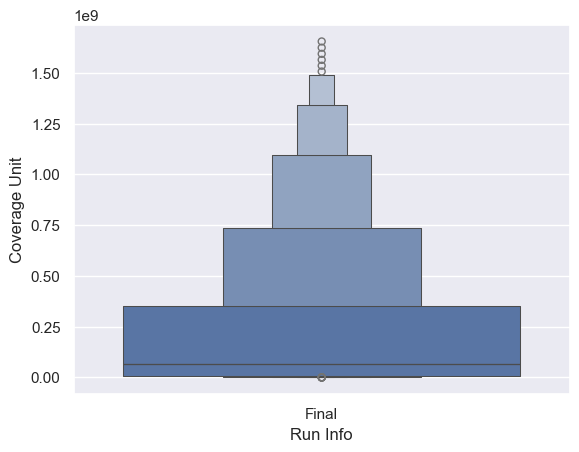

In [126]:
sns.boxenplot(data=data, x="Run Info", y="Coverage Unit")

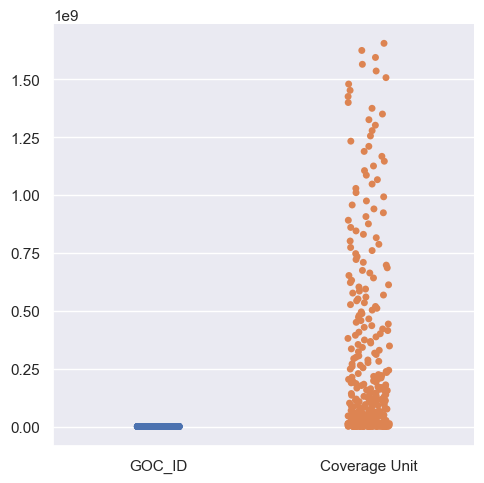

In [127]:
sns.catplot(data=data)

In [128]:
data = pd.read_excel(xlsx, sheet_name=sheets[7])

print(sheets[7])

data.head()

Reference


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Frequency,NaN,Cashflow Occurrence,NaN,RA Loading on,NaN,Coverage Unit Basis,NaN,Closing Type
2,NaN,Annual,NaN,Beginning of period,NaN,Claims only,NaN,Premium,NaN,YTD
3,NaN,Quarterly,NaN,Middle of period,NaN,Claims and Expenses,NaN,SI,NaN,PTD
4,NaN,Monthly,NaN,End of period,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Unnamed: 1  8 non-null      object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  13 non-null     object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  6 non-null      object 
 6   Unnamed: 6  0 non-null      float64
 7   Unnamed: 7  6 non-null      object 
 8   Unnamed: 8  0 non-null      float64
 9   Unnamed: 9  3 non-null      object 
dtypes: float64(5), object(5)
memory usage: 1.3+ KB


In [130]:
data.describe(include="all")

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,0.0,8,0.0,13,0.0,6,0.0,6,0.0,3
unique,NaN,8,NaN,13,NaN,6,NaN,6,NaN,3
top,NaN,Frequency,NaN,Cashflow Occurrence,NaN,RA Loading on,NaN,Coverage Unit Basis,NaN,Closing Type
freq,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


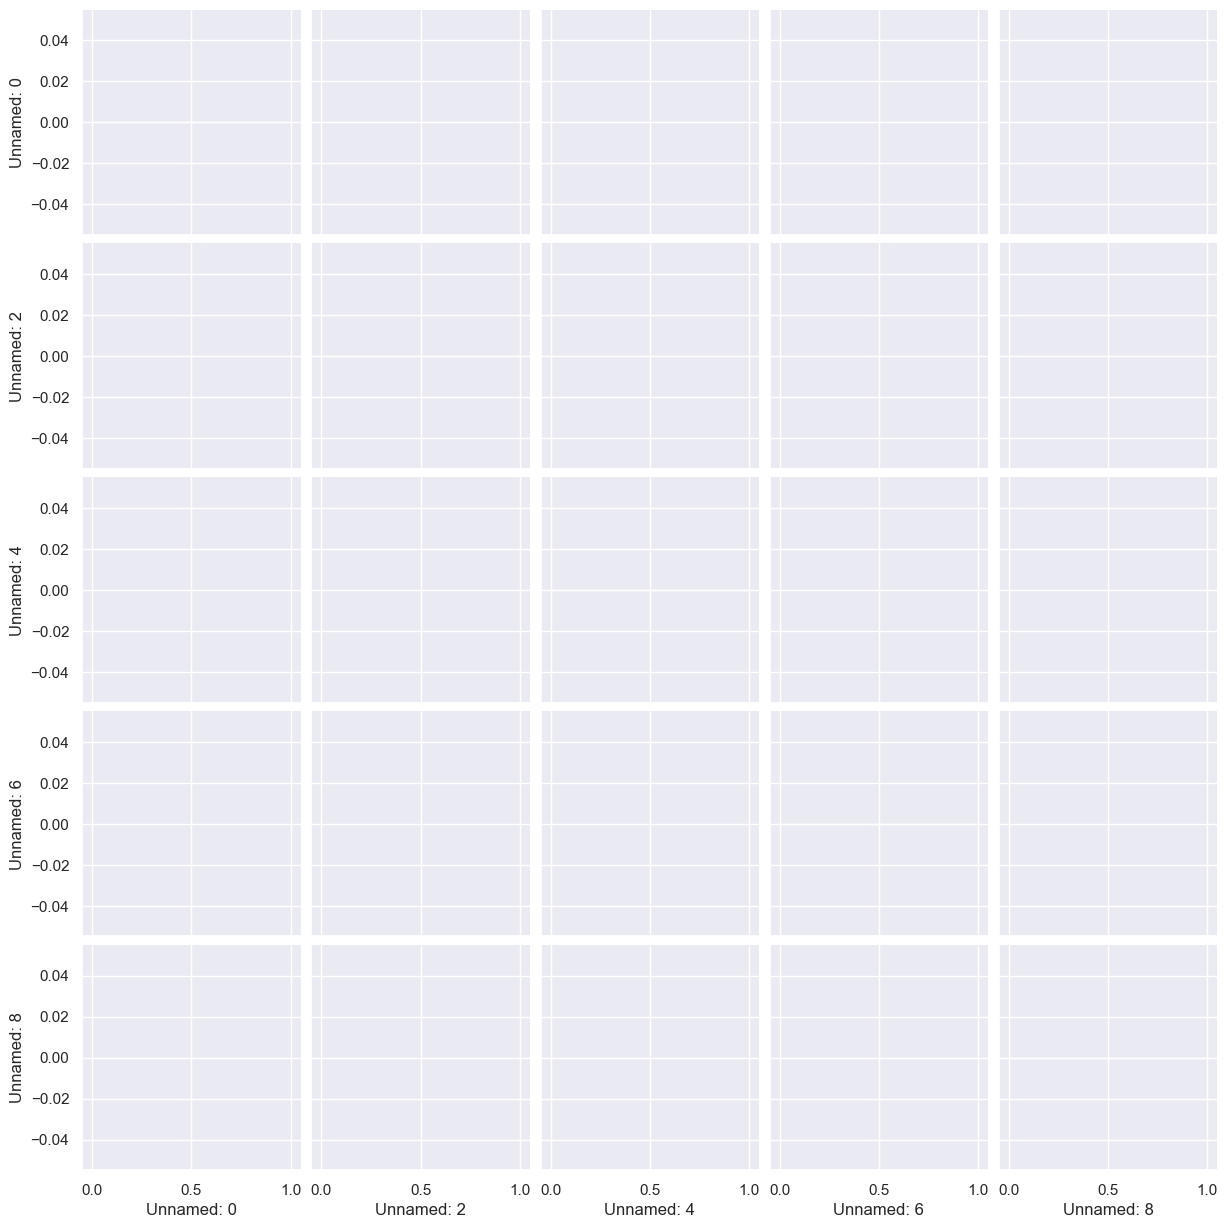

In [131]:
sns.pairplot(data=data)